In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('football_transfers_2021.csv', skip_blank_lines=True)

In [4]:
df

,player_name,position,age,team_origin,country_origin,league_origin,team_dest,country_dest,league_dest,transfer_fee,date
0,Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,€22.00m,2021-01-01
1,Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,€8.50m,2021-01-01
2,Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,€5.45m,2021-01-01
3,Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,€4.50m,2021-01-01
4,Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,€4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...
65484,Alexander Hjaelmhof,Central Midfield,20.0,San Diego State,United States,United States,Retired,NaN,NaN,-,2021-12-31
65485,Sehmus Aslan,Left Winger,21.0,1922 Konya,Turkey,2.Lig Beyaz,Without Club,NaN,NaN,-,2021-12-31
65486,Daniel Rodríguez,Right-Back,27.0,Coimbra,Portugal,Liga Sabseg,Without Club,NaN,NaN,-,2021-12-31
65487,Marcão,Goalkeeper,21.0,Coritiba FC B,Brazil,Brazil,Coritiba FC,Brazil,Série B,-,2021-12-31


## Rename columns of dataframe

In [5]:
df = df.rename(columns={
                "player_name":"Player", 
                "position":"Position",
                "age":"Age",
                "team_origin":"Team Origin",
                "country_origin":"Country Origin",
                "league_origin":"League Origin",
                "team_dest":"Team Destination",
                "country_dest":"Country Destination",
                "league_dest":"League Destination",
                "transfer_fee":"Transfer Fee (€)",
                "date":"Date"})

In [6]:
df

,Player,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
0,Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,€22.00m,2021-01-01
1,Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,€8.50m,2021-01-01
2,Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,€5.45m,2021-01-01
3,Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,€4.50m,2021-01-01
4,Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,€4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...
65484,Alexander Hjaelmhof,Central Midfield,20.0,San Diego State,United States,United States,Retired,NaN,NaN,-,2021-12-31
65485,Sehmus Aslan,Left Winger,21.0,1922 Konya,Turkey,2.Lig Beyaz,Without Club,NaN,NaN,-,2021-12-31
65486,Daniel Rodríguez,Right-Back,27.0,Coimbra,Portugal,Liga Sabseg,Without Club,NaN,NaN,-,2021-12-31
65487,Marcão,Goalkeeper,21.0,Coritiba FC B,Brazil,Brazil,Coritiba FC,Brazil,Série B,-,2021-12-31


In [7]:
df.columns

Index(['Player', 'Position', 'Age', 'Team Origin', 'Country Origin',
       'League Origin', 'Team Destination', 'Country Destination',
       'League Destination', 'Transfer Fee (€)', 'Date'],
      dtype='object')

In [8]:
df.dtypes

Player                  object
Position                object
Age                    float64
Team Origin             object
Country Origin          object
League Origin           object
Team Destination        object
Country Destination     object
League Destination      object
Transfer Fee (€)        object
Date                    object
dtype: object

In [9]:
## Data cleaning
## Look at Null Values in DataFrame

for col in df.columns:
    pct_missing = round(np.mean(df[col].isnull()),2)
    print('{}-{}%'.format(col, pct_missing))

Player-0.0%
Position-0.0%
Age-0.0%
Team Origin-0.0%
Country Origin-0.08%
League Origin-0.08%
Team Destination-0.0%
Country Destination-0.15%
League Destination-0.15%
Transfer Fee (€)-0.0%
Date-0.0%


In [10]:
# Remove all null values
df = df.dropna()

In [11]:
df

,Player,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
0,Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,€22.00m,2021-01-01
1,Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,€8.50m,2021-01-01
2,Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,€5.45m,2021-01-01
3,Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,€4.50m,2021-01-01
4,Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,€4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...
65462,Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,loan transfer,2021-12-31
65463,Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,?,2021-12-31
65464,Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,?,2021-12-31
65481,Reginaldo,Centre-Back,29.0,CRB,Brazil,Série B,Fluminense,Brazil,Série A,-,2021-12-31


In [12]:
df.dtypes

Player                  object
Position                object
Age                    float64
Team Origin             object
Country Origin          object
League Origin           object
Team Destination        object
Country Destination     object
League Destination      object
Transfer Fee (€)        object
Date                    object
dtype: object

In [13]:
## change the data type in column Transfer Fee

df['Transfer Fee (€)'].unique

<bound method Series.unique of 0              €22.00m
1               €8.50m
2               €5.45m
3               €4.50m
4               €4.48m
             ...      
65462    loan transfer
65463                ?
65464                ?
65481                -
65487                -
Name: Transfer Fee (€), Length: 50531, dtype: object>

In [14]:
df.loc[df['Transfer Fee (€)']=='loan transfer', 'Transfer Fee (€)'] = 0

C:\Users\Lukasz\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [15]:
df

,Player,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
0,Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,€22.00m,2021-01-01
1,Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,€8.50m,2021-01-01
2,Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,€5.45m,2021-01-01
3,Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,€4.50m,2021-01-01
4,Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,€4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...
65462,Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31
65463,Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,?,2021-12-31
65464,Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,?,2021-12-31
65481,Reginaldo,Centre-Back,29.0,CRB,Brazil,Série B,Fluminense,Brazil,Série A,-,2021-12-31


In [16]:
df.loc[df['Transfer Fee (€)']=='?', 'Transfer Fee (€)'] = 0

C:\Users\Lukasz\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [17]:
df

,Player,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
0,Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,€22.00m,2021-01-01
1,Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,€8.50m,2021-01-01
2,Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,€5.45m,2021-01-01
3,Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,€4.50m,2021-01-01
4,Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,€4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...
65462,Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31
65463,Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0,2021-12-31
65464,Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0,2021-12-31
65481,Reginaldo,Centre-Back,29.0,CRB,Brazil,Série B,Fluminense,Brazil,Série A,-,2021-12-31


In [18]:
 df.loc[df['Transfer Fee (€)']=='draft', 'Transfer Fee (€)'] = 0

C:\Users\Lukasz\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [19]:
df.loc[df['Transfer Fee (€)']=='-', 'Transfer Fee (€)'] = 0

In [20]:
df.loc[df['Transfer Fee (€)']=='free transfer', 'Transfer Fee (€)'] = 0

In [21]:
df

,Player,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
0,Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,€22.00m,2021-01-01
1,Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,€8.50m,2021-01-01
2,Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,€5.45m,2021-01-01
3,Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,€4.50m,2021-01-01
4,Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,€4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...
65462,Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31
65463,Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0,2021-12-31
65464,Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0,2021-12-31
65481,Reginaldo,Centre-Back,29.0,CRB,Brazil,Série B,Fluminense,Brazil,Série A,0,2021-12-31


In [22]:
df.loc[df['Transfer Fee (€)'].str.contains('Loan fee', na=False)] = 0 

C:\Users\Lukasz\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [23]:
df['Transfer Fee (€)'].value_counts()

0          48863
€500Th.       74
€1.00m        71
€200Th.       54
€2.00m        54
           ...  
€3.31m         1
€822Th.        1
€85.00m        1
€315Th.        1
€83Th.         1
Name: Transfer Fee (€), Length: 419, dtype: int64

In [24]:
df.dtypes

Player                  object
Position                object
Age                    float64
Team Origin             object
Country Origin          object
League Origin           object
Team Destination        object
Country Destination     object
League Destination      object
Transfer Fee (€)        object
Date                    object
dtype: object

In [25]:
df

,Player,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
0,Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,€22.00m,2021-01-01
1,Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,€8.50m,2021-01-01
2,Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,€5.45m,2021-01-01
3,Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,€4.50m,2021-01-01
4,Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,€4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...
65462,Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31
65463,Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0,2021-12-31
65464,Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0,2021-12-31
65481,Reginaldo,Centre-Back,29.0,CRB,Brazil,Série B,Fluminense,Brazil,Série A,0,2021-12-31


In [26]:
df['Transfer Fee (€)'] = df['Transfer Fee (€)'].str.replace('€', ' ')

<ipython-input-26-5fa76f289507>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transfer Fee (€)'] = df['Transfer Fee (€)'].str.replace('€', ' ')


In [27]:
df

,Player,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
0,Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22.00m,2021-01-01
1,Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8.50m,2021-01-01
2,Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5.45m,2021-01-01
3,Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4.50m,2021-01-01
4,Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...
65462,Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,NaN,2021-12-31
65463,Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,NaN,2021-12-31
65464,Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,NaN,2021-12-31
65481,Reginaldo,Centre-Back,29.0,CRB,Brazil,Série B,Fluminense,Brazil,Série A,NaN,2021-12-31


In [28]:
df['Transfer Fee (€)'] = df['Transfer Fee (€)'].fillna(0)

<ipython-input-28-67d2e87fe8f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transfer Fee (€)'] = df['Transfer Fee (€)'].fillna(0)


In [29]:
df['Transfer Fee (€)'] = df['Transfer Fee (€)'].str.replace(',', '.')


<ipython-input-29-8ab326e5a672>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transfer Fee (€)'] = df['Transfer Fee (€)'].str.replace(',', '.')


In [30]:
df['Transfer Fee (€)'] = df['Transfer Fee (€)'].fillna(0)

<ipython-input-30-67d2e87fe8f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transfer Fee (€)'] = df['Transfer Fee (€)'].fillna(0)


In [31]:
df

,Player,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
0,Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22.00m,2021-01-01
1,Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8.50m,2021-01-01
2,Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5.45m,2021-01-01
3,Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4.50m,2021-01-01
4,Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...
65462,Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31
65463,Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0,2021-12-31
65464,Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0,2021-12-31
65481,Reginaldo,Centre-Back,29.0,CRB,Brazil,Série B,Fluminense,Brazil,Série A,0,2021-12-31


In [32]:
df['Transfer Fee (€)'] = df['Transfer Fee (€)'].str.replace('Th.', 'Th')


<ipython-input-32-bb3a891e0298>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Transfer Fee (€)'] = df['Transfer Fee (€)'].str.replace('Th.', 'Th')
<ipython-input-32-bb3a891e0298>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transfer Fee (€)'] = df['Transfer Fee (€)'].str.replace('Th.', 'Th')


In [33]:
df['Transfer Fee (€)'] = df['Transfer Fee (€)'].fillna(0)

<ipython-input-33-67d2e87fe8f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transfer Fee (€)'] = df['Transfer Fee (€)'].fillna(0)


In [34]:
df['Transfer Fee (€)']=df['Transfer Fee (€)'].replace({"Th":"*1e3", "m":"*1e6"}, regex=True).map(pd.eval).astype(int)

<ipython-input-34-0c987d5731b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transfer Fee (€)']=df['Transfer Fee (€)'].replace({"Th":"*1e3", "m":"*1e6"}, regex=True).map(pd.eval).astype(int)


In [35]:
df

,Player,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
0,Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01
1,Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01
2,Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000,2021-01-01
3,Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000,2021-01-01
4,Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...
65462,Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31
65463,Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0,2021-12-31
65464,Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0,2021-12-31
65481,Reginaldo,Centre-Back,29.0,CRB,Brazil,Série B,Fluminense,Brazil,Série A,0,2021-12-31


In [36]:
df['Age'] = df['Age'].astype('int32')

<ipython-input-36-ae87e5c12644>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].astype('int32')


### Add a month column


In [37]:
#Verify if we have NaN in our dataframe:

nan_df = df[df.isna().any(axis=1)]
nan_df.head()

df = df.dropna(how='all')
df.head()

,Player,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
0,Dominik Szoboszlai,Left Winger,20,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01
1,Filip Stevanovic,Left Winger,18,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01
2,Brenden Aaronson,Attacking Midfield,20,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000,2021-01-01
3,Víctor Dávila,Centre-Forward,23,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000,2021-01-01
4,Carlos González,Centre-Forward,27,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000,2021-01-01


In [38]:
nan_df = df[df.isna().any(axis=1)]
nan_df

,Player,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date


In [39]:
# Change all  values to NaN
df.replace(0, np.nan, inplace=True)


In [40]:
nan_df = df[df.isna().any(axis=1)]
nan_df

,Player,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,Artem Milevskyi,Centre-Forward,35.0,Dynamo Brest,Belarus,Vysheyshaya Liga,FK Minaj,Ukraine,Premier Liga,NaN,2021-01-01
64,Gino Parson,Attacking Midfield,41.0,Stadtallendorf,Germany,Regionalliga Südwest,FC Gießen,Germany,Regionalliga Südwest,NaN,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...
65462,Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,NaN,2021-12-31
65463,Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,NaN,2021-12-31
65464,Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,NaN,2021-12-31
65481,Reginaldo,Centre-Back,29.0,CRB,Brazil,Série B,Fluminense,Brazil,Série A,NaN,2021-12-31


In [41]:
df = df.dropna(how='all')


In [42]:
nan_df = df[df.isna().any(axis=1)]
nan_df.head()

,Player,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
63,Artem Milevskyi,Centre-Forward,35.0,Dynamo Brest,Belarus,Vysheyshaya Liga,FK Minaj,Ukraine,Premier Liga,NaN,2021-01-01
64,Gino Parson,Attacking Midfield,41.0,Stadtallendorf,Germany,Regionalliga Südwest,FC Gießen,Germany,Regionalliga Südwest,NaN,2021-01-01
65,Behrang Safari,Left-Back,35.0,Malmö FF,Sweden,Allsvenskan,Lunds SK,Sweden,Sweden,NaN,2021-01-01
67,Ariel Cólzera,Second Striker,34.0,CA Temperley,Argentina,Primera Nacional,Deportivo Merlo,Argentina,Argentina,NaN,2021-01-01
68,Robbie Weir,Central Midfield,32.0,Waterford FC,Ireland,Premier Division,Crusaders,Northern Ireland,Premiership,NaN,2021-01-01


In [43]:
# Change NaN to 0 in Transfer Fee 
df['Transfer Fee (€)'] = df['Transfer Fee (€)'].replace(np.nan, 0)

In [44]:
#It should be blank dataframe due to lack of 0 values in Transfer Fee
nan_df = df[df.isna().any(axis=1)]
nan_df.head()

,Player,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date


In [45]:
df['Month'] = df['Date'].str[5:7]
df['Month'] = df['Month'].astype('int')
df.head()

,Player,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
0,Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000.0,2021-01-01,1
1,Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000.0,2021-01-01,1
2,Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000.0,2021-01-01,1
3,Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000.0,2021-01-01,1
4,Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000.0,2021-01-01,1


In [46]:
df

,Player,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
0,Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000.0,2021-01-01,1
1,Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000.0,2021-01-01,1
2,Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000.0,2021-01-01,1
3,Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000.0,2021-01-01,1
4,Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000.0,2021-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
65462,Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0.0,2021-12-31,12
65463,Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0.0,2021-12-31,12
65464,Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0.0,2021-12-31,12
65481,Reginaldo,Centre-Back,29.0,CRB,Brazil,Série B,Fluminense,Brazil,Série A,0.0,2021-12-31,12


In [47]:
#Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])
# Convert Age and Transfer Fee (€) to int

df['Age']=df['Age'].astype("int32")
df['Transfer Fee (€)'] =  df['Transfer Fee (€)'].astype("int32")

In [48]:
df.dtypes

Player                         object
Position                       object
Age                             int32
Team Origin                    object
Country Origin                 object
League Origin                  object
Team Destination               object
Country Destination            object
League Destination             object
Transfer Fee (€)                int32
Date                   datetime64[ns]
Month                           int32
dtype: object

In [49]:
df

,Player,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
0,Dominik Szoboszlai,Left Winger,20,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01,1
1,Filip Stevanovic,Left Winger,18,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01,1
2,Brenden Aaronson,Attacking Midfield,20,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000,2021-01-01,1
3,Víctor Dávila,Centre-Forward,23,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000,2021-01-01,1
4,Carlos González,Centre-Forward,27,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000,2021-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
65462,Raffaele Scuderi,Right Midfield,19,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31,12
65463,Emiliano Tortolano,Right Winger,31,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0,2021-12-31,12
65464,Dylan Kambo,Central Midfield,26,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0,2021-12-31,12
65481,Reginaldo,Centre-Back,29,CRB,Brazil,Série B,Fluminense,Brazil,Série A,0,2021-12-31,12


Basic information about dataframe after cleaning

In [50]:
df.info(), df.size, df.shape, df.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50267 entries, 0 to 65487
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Player               50267 non-null  object        
 1   Position             50267 non-null  object        
 2   Age                  50267 non-null  int32         
 3   Team Origin          50267 non-null  object        
 4   Country Origin       50267 non-null  object        
 5   League Origin        50267 non-null  object        
 6   Team Destination     50267 non-null  object        
 7   Country Destination  50267 non-null  object        
 8   League Destination   50267 non-null  object        
 9   Transfer Fee (€)     50267 non-null  int32         
 10  Date                 50267 non-null  datetime64[ns]
 11  Month                50267 non-null  int32         
dtypes: datetime64[ns](1), int32(3), object(8)
memory usage: 4.4+ MB


(None,
 603204,
 (50267, 12),
 object            8
 int32             3
 datetime64[ns]    1
 dtype: int64)

## Counting the quantity of transfer in 2021

In [51]:
df

,Player,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
0,Dominik Szoboszlai,Left Winger,20,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01,1
1,Filip Stevanovic,Left Winger,18,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01,1
2,Brenden Aaronson,Attacking Midfield,20,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000,2021-01-01,1
3,Víctor Dávila,Centre-Forward,23,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000,2021-01-01,1
4,Carlos González,Centre-Forward,27,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000,2021-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
65462,Raffaele Scuderi,Right Midfield,19,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31,12
65463,Emiliano Tortolano,Right Winger,31,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0,2021-12-31,12
65464,Dylan Kambo,Central Midfield,26,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0,2021-12-31,12
65481,Reginaldo,Centre-Back,29,CRB,Brazil,Série B,Fluminense,Brazil,Série A,0,2021-12-31,12


In [52]:
CountingTransfersperMonth = df.groupby(['Month'])['Player'].count()

In [53]:
CountingTransfersperMonth.to_frame()

,Player
Month,
1,7854
2,5215
3,2570
4,1728
5,593
6,646
7,17666
8,8399
9,2957


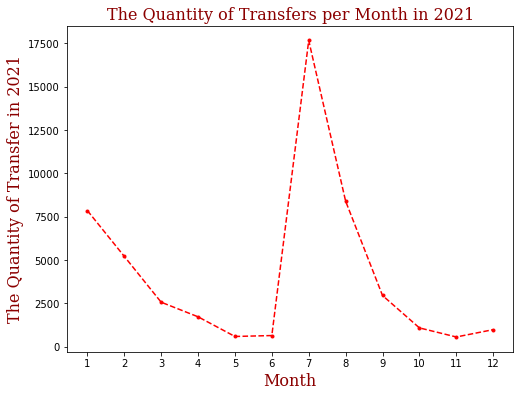

<Figure size 72x72 with 0 Axes>

In [54]:
## change the font of label and title


plt.figure(figsize=(8,6))

plt.plot(CountingTransfersperMonth, 'r.--')

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.title('The Quantity of Transfers per Month in 2021', fontdict=font)
plt.ylabel('The Quantity of Transfer in 2021', fontdict=font)

plt.xlabel('Month', fontdict=font)

plt.gca().set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])

plt.figure(figsize=(1,1))


plt.show()

## The classification of Players by age

<Figure size 576x432 with 0 Axes>

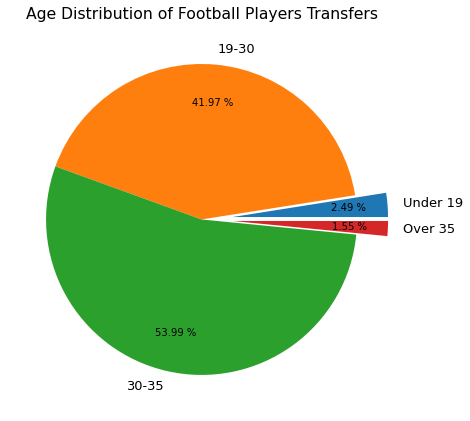

<Figure size 72x72 with 0 Axes>

In [55]:
## ## change the font of label and title

plt.style.use('seaborn-talk')
plt.figure(figsize=(8,6))

Teenager = df.loc[df['Age'] < 19].count()[0]
Youth = df.loc[(df['Age'] >= 19) & (df['Age'] < 30) ].count()[0]
Adults = df.loc[(df['Age'] >= 30) &  df['Age'] < 35 ].count()[0]
Senior = df.loc[df['Age'] >= 35].count()[0]


Age = [Teenager,Youth, Adults, Senior ]
labels = ['Under 19', '19-30', '30-35', 'Over 35' ]
explode = (0.2, 0, 0, 0.2)

fig1, ax1 = plt.subplots()

plt.pie(Age, labels=labels, autopct='%.2f %%', pctdistance=0.75, explode=explode)


plt.title('Age Distribution of Football Players Transfers')
plt.figure(figsize=(1,1))


plt.show()

### Dataframe was split into Player with fee transfer and without it to proceed with analysis

In [56]:
df_transfer_players = df.loc[df['Transfer Fee (€)']>0]
df_transfer_players

,Player,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
0,Dominik Szoboszlai,Left Winger,20,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01,1
1,Filip Stevanovic,Left Winger,18,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01,1
2,Brenden Aaronson,Attacking Midfield,20,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000,2021-01-01,1
3,Víctor Dávila,Centre-Forward,23,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000,2021-01-01,1
4,Carlos González,Centre-Forward,27,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000,2021-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
64843,Sebastian Lletget,Central Midfield,29,Los Angeles,United States,MLS,New England,United States,MLS,1180000,2021-12-16,12
64844,Theerathon Bunmathan,Left-Back,31,Yokohama F. M.,Japan,J1 League,Buriram Utd.,Thailand,Thai League,200000,2021-12-16,12
64845,Dylan Nealis,Right-Back,23,Nashville,United States,MLS,New York,United States,MLS,182000,2021-12-16,12
64846,Ariel Lassiter,Left Winger,27,Houston,United States,MLS,Miami,United States,MLS,91000,2021-12-16,12


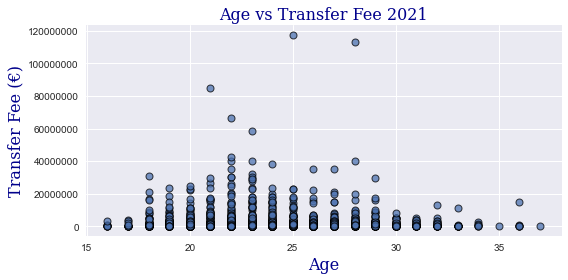

In [57]:
#The correlations between Age and Transfer Fee. Age vs Transfer Fee
## change the font of label and title

Age = df_transfer_players['Age']
TransferFee = df_transfer_players['Transfer Fee (€)'] 

plt.style.use('seaborn')
plt.figure(figsize=(8,4))


font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }


plt.scatter(Age, TransferFee,edgecolor='black',linewidth=1, alpha=0.75)

plt.title('Age vs Transfer Fee 2021', fontdict=font)
plt.ylabel('Transfer Fee (€)', fontdict=font)
plt.xlabel('Age', fontdict=font)
plt.ticklabel_format(style='plain')

plt.tight_layout()

plt.show()


## Creating a graph Position by Transfer Fee

In [58]:
df_transfer_players

,Player,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
0,Dominik Szoboszlai,Left Winger,20,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01,1
1,Filip Stevanovic,Left Winger,18,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01,1
2,Brenden Aaronson,Attacking Midfield,20,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000,2021-01-01,1
3,Víctor Dávila,Centre-Forward,23,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000,2021-01-01,1
4,Carlos González,Centre-Forward,27,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000,2021-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
64843,Sebastian Lletget,Central Midfield,29,Los Angeles,United States,MLS,New England,United States,MLS,1180000,2021-12-16,12
64844,Theerathon Bunmathan,Left-Back,31,Yokohama F. M.,Japan,J1 League,Buriram Utd.,Thailand,Thai League,200000,2021-12-16,12
64845,Dylan Nealis,Right-Back,23,Nashville,United States,MLS,New York,United States,MLS,182000,2021-12-16,12
64846,Ariel Lassiter,Left Winger,27,Houston,United States,MLS,Miami,United States,MLS,91000,2021-12-16,12


In [59]:
#df_transfer_players.reset_index(drop=True, inplace=True)

In [60]:
df_transfer_players

,Player,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
0,Dominik Szoboszlai,Left Winger,20,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01,1
1,Filip Stevanovic,Left Winger,18,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01,1
2,Brenden Aaronson,Attacking Midfield,20,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000,2021-01-01,1
3,Víctor Dávila,Centre-Forward,23,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000,2021-01-01,1
4,Carlos González,Centre-Forward,27,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000,2021-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
64843,Sebastian Lletget,Central Midfield,29,Los Angeles,United States,MLS,New England,United States,MLS,1180000,2021-12-16,12
64844,Theerathon Bunmathan,Left-Back,31,Yokohama F. M.,Japan,J1 League,Buriram Utd.,Thailand,Thai League,200000,2021-12-16,12
64845,Dylan Nealis,Right-Back,23,Nashville,United States,MLS,New York,United States,MLS,182000,2021-12-16,12
64846,Ariel Lassiter,Left Winger,27,Houston,United States,MLS,Miami,United States,MLS,91000,2021-12-16,12


In [61]:
df_transfer_players.loc[df_transfer_players['Position'] == 'attack', 'Position'] = 'Attack'

C:\Users\Lukasz\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [62]:
results =  df_transfer_players.groupby('Position').sum()
results

,Age,Transfer Fee (€),Month
Position,,,
Attack,21,1550000,2
Attacking Midfield,3275,313097999,766
Central Midfield,4346,556894998,1115
Centre-Back,6403,886407000,1527
Centre-Forward,8035,963901999,1887
Defensive Midfield,2944,306312999,644
Goalkeeper,2087,189449000,497
Left Midfield,415,57972000,97
Left Winger,3685,667978000,913


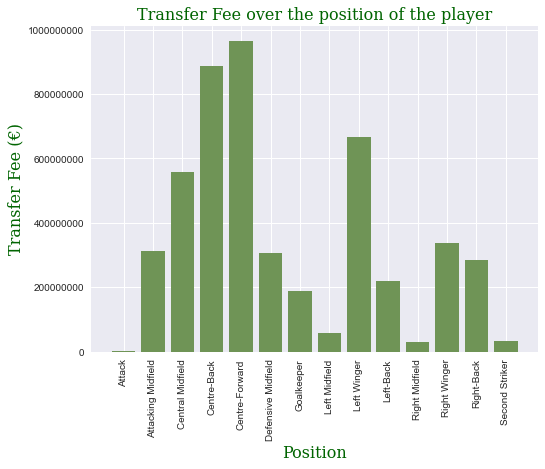

In [63]:

Position = [position for position, df in df_transfer_players.groupby('Position')]


plt.figure(figsize=(8,6))

plt.bar(Position, results['Transfer Fee (€)'], color='#6f9456')
plt.xticks(Position, rotation = 'vertical', size=10)


font = {'family': 'serif',
        'color':  'darkgreen',
        'weight': 'normal',
        'size': 16,
        }

plt.title('Transfer Fee over the position of the player', fontdict=font)
plt.ylabel('Transfer Fee (€)', fontdict=font)
plt.xlabel('Position',fontdict=font)


plt.ticklabel_format(style='plain', axis='y')

plt.show()

## The Best League on The World and Spendings

In [64]:
df_transfer_players

,Player,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
0,Dominik Szoboszlai,Left Winger,20,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01,1
1,Filip Stevanovic,Left Winger,18,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01,1
2,Brenden Aaronson,Attacking Midfield,20,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000,2021-01-01,1
3,Víctor Dávila,Centre-Forward,23,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000,2021-01-01,1
4,Carlos González,Centre-Forward,27,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000,2021-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
64843,Sebastian Lletget,Central Midfield,29,Los Angeles,United States,MLS,New England,United States,MLS,1180000,2021-12-16,12
64844,Theerathon Bunmathan,Left-Back,31,Yokohama F. M.,Japan,J1 League,Buriram Utd.,Thailand,Thai League,200000,2021-12-16,12
64845,Dylan Nealis,Right-Back,23,Nashville,United States,MLS,New York,United States,MLS,182000,2021-12-16,12
64846,Ariel Lassiter,Left Winger,27,Houston,United States,MLS,Miami,United States,MLS,91000,2021-12-16,12


In [65]:
df_transfer_players['League Destination'].unique()

#Top 5 League: Bundesliga, Premier League, LaLiga, Serie A, Ligue 1

array(['Bundesliga', 'Premier League', 'Liga MX Clausura', 'MLS',
       'Super League', 'Super League 1', 'Stars League',
       'Primera División', 'Primera División Clausura', 'Ekstraklasa',
       'Liga Profesional', 'Allsvenskan', 'Liga 1 - Championship group',
       'Liga 1 Clausura', 'Premier Liga', 'Liga 1 - Relegation group',
       'Virsliga', 'Primera B', '2. Bundesliga', 'Protathlima Cyta',
       '1.Division', '1 Liga', 'División Profesional',
       'Superligaen Relegation round', 'efbet Liga',
       'Crystalbet Erovnuli Liga', 'U19 M-Liga', 'A Lyga', 'Ligue 1',
       '3. Liga', 'Fortuna Liga', 'Serie A', 'Liga Bwin',
       'Jupiler Pro League', '1B Pro League', 'LaLiga', 'League One',
       'Superligaen', 'Serie C - B', 'Série A', 'Süper Lig', 'Eredivisie',
       'K League 1', 'Premier League 2', 'FNL-2 Group 2', 'J1 League',
       'Vysheyshaya Liga', 'U16 Youth Football League',
       'Professional League', 'Primera Div. Clausura', 'UAE Pro League',
       '1.Li

In [81]:
## filtering data for these leagues then make calculations and graphs
#using largest and n smallest for each laegue
#each league, then for each position and players from each league!!

League = ["Bundesliga","Premier League","LaLiga","Serie A","Ligue 1"]
Country = ["Germany","England","Spain", "Italy", "France"]

Leagues = df_transfer_players['League Destination'].isin(League)
Countries = df_transfer_players['Country Destination'].isin(Country)

mask = Leagues & Countries

df_top5_leagues = df_transfer_players[mask]

df_top5_leagues

,Player,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
0,Dominik Szoboszlai,Left Winger,20,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01,1
1,Filip Stevanovic,Left Winger,18,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01,1
13,Joe Scally,Right-Back,18,New York City,United States,MLS,Bor. M'gladbach,Germany,Bundesliga,1800000,2021-01-01,1
15,Frederik Alves,Centre-Back,21,Silkeborg IF,Denmark,1.Division,West Ham,England,Premier League,1600000,2021-01-01,1
4778,Amad Diallo,Right Winger,18,Atalanta BC,Italy,Serie A,Man Utd,England,Premier League,21300000,2021-01-02,1
...,...,...,...,...,...,...,...,...,...,...,...,...
56126,Jakub Kiwior,Centre-Back,21,MSK Zilina,Slovakia,Fortuna Liga,Spezia Calcio,Italy,Serie A,1500000,2021-08-31,8
56147,Ridgeciano Haps,Left-Back,28,Feyenoord,Netherlands,Eredivisie,Venezia,Italy,Serie A,500000,2021-08-31,8
56153,Nick Viergever,Centre-Back,32,PSV Eindhoven,Netherlands,Eredivisie,Greuther Fürth,Germany,Bundesliga,300000,2021-08-31,8
56157,Sebastian Griesbeck,Defensive Midfield,30,Union Berlin,Germany,Bundesliga,Greuther Fürth,Germany,Bundesliga,250000,2021-08-31,8


In [89]:
df_top5_leagues.groupby(['League Destination'])['Transfer Fee (€)'].agg([np.sum])

,sum
League Destination,
Bundesliga,462320000
LaLiga,302500000
Ligue 1,351100000
Premier League,1391070000
Serie A,651340000


In [128]:
TOP5Leagues = df_top5_leagues.groupby(['League Destination']).sum()
TOP5Leagues

,Age,Transfer Fee (€),Month
League Destination,,,
Bundesliga,1552,462320000,466
LaLiga,1237,302500000,328
Ligue 1,1257,351100000,389
Premier League,1693,1391070000,488
Serie A,2513,651340000,720


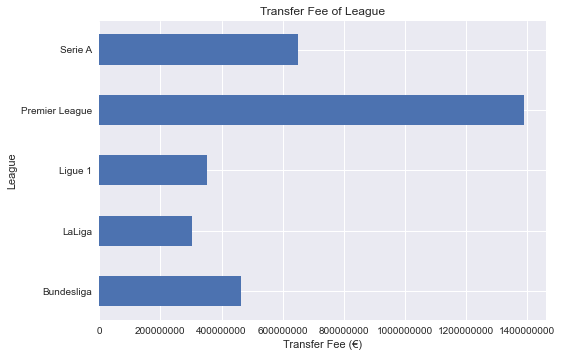

In [129]:

leagues = [leagues for leagues, df in TOP5Leagues.groupby('League Destination')]


plt.barh(leagues, TOP5Leagues['Transfer Fee (€)'], height=0.5)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Transfer Fee of League')
plt.ylabel('League')
plt.xlabel('Transfer Fee (€)')

plt.show()

In [110]:
pd.set_option('display.max_rows', None)


In [111]:
df_top5_leagues.groupby(['League Destination', 'Player','Team Destination','Position'])['Transfer Fee (€)'].agg([np.sum])


sum
League Destination Player                  Team Destination Position                     
Bundesliga         Amine Adli              Bay. Leverkusen  Right Winger          7500000
                   André Silva             RB Leipzig       Centre-Forward       23000000
                   Angeliño                RB Leipzig       Left Midfield        18000000
                   Anton Stach             1.FSV Mainz 05   Defensive Midfield    3500000
                   Aster Vranckx           VfL Wolfsburg    Central Midfield      8000000
                   Benjamin Henrichs       RB Leipzig       Right-Back           15000000
                   Bryan Lasme             Arm. Bielefeld   Right Winger           800000
                   Caden Clark             RB Leipzig       Attacking Midfield    1820000
                   Chris Führich           VfB Stuttgart    Right Winger          2500000
                   Daniel Klein            FC Augsburg      Goalkeeper             200000
                   Dayot Upamecano         FC Bayern        Centre-Back          42500000
                   Demarai Gray            Bay. Leverkusen  Left Winger           2000000
                   Diant Ramaj             E. Frankfurt     Goalkeeper             100000
                   Dominik Szoboszlai      RB Leipzig       Left Winger          22000000
                   Donyell Malen           Bor. Dortmund    Centre-Forward       30000000
                   Enzo Millot             VfB Stuttgart    Central Midfield      1750000
                   Florian Krüger          Arm. Bielefeld   Centre-Forward        1000000
                   Florian Müller          VfB Stuttgart    Goalkeeper            5000000
                   Frederik Rönnow         Union Berlin     Goalkeeper            1000000
                   Georginio Rutter        TSG Hoffenheim   Centre-Forward         750000
                   Gregor Kobel            Bor. Dortmund    Goalkeeper           15000000
                   Guilherme Ramos         Arm. Bielefeld   Centre-Back           1200000
                   Hannes Wolf             Bor. M'gladbach  Attacking Midfield    9500000
                   Igor Matanovic          E. Frankfurt     Centre-Forward         500000
                   Ilaix Moriba            RB Leipzig       Central Midfield     16000000
                   Ishak Belfodil          Hertha BSC       Centre-Forward         500000
                   Jens Grahl              E. Frankfurt     Goalkeeper             250000
                   Jeremie Frimpong        Bay. Leverkusen  Right-Back           11000000
                   Jeremy Dudziak          Greuther Fürth   Attacking Midfield     750000
                   Jesper Lindström        E. Frankfurt     Attacking Midfield    7000000
                   Joe Scally              Bor. M'gladbach  Right-Back            1800000
                   Josko Gvardiol          RB Leipzig       Centre-Back          18800000
                   Julius Kade             Union Berlin     Central Midfield       500000
                   Jurgen Ekkelenkamp      Hertha BSC       Central Midfield      3000000
                   Keita Endo              Union Berlin     Left Winger            900000
                   Kevin Möhwald           Union Berlin     Central Midfield      1000000
                   Kouadio Koné            Bor. M'gladbach  Central Midfield      9000000
                   Leon Dajaku             Union Berlin     Second Striker        1000000
                   Luca Netz               Bor. M'gladbach  Left-Back             2000000
                   Luca Waldschmidt        VfL Wolfsburg    Second Striker       12000000
                   Lukas Nmecha            VfL Wolfsburg    Centre-Forward        8000000
                   Marcel Sabitzer         FC Bayern        Central Midfield     15000000
                   Marco Richter           Hertha BSC       Right Winger          7100000
                   Masaya Okugawa   

In [103]:
df_top5_leagues.groupby(['League Destination', 'Position'])['Age'].agg([np.mean])

mean
League Destination Position                     
Bundesliga         Attacking Midfield  22.200000
                   Central Midfield    22.363636
                   Centre-Back         22.000000
                   Centre-Forward      21.888889
                   Defensive Midfield  23.500000
                   Goalkeeper          24.250000
                   Left Midfield       24.000000
                   Left Winger         22.200000
                   Left-Back           20.333333
                   Right Winger        21.800000
                   Right-Back          22.600000
                   Second Striker      24.000000
LaLiga             Attacking Midfield  23.000000
                   Central Midfield    23.400000
                   Centre-Back         28.200000
                   Centre-Forward      25.272727
                   Defensive Midfield  28.500000
                   Goalkeeper          24.666667
                   Left Midfield       25.000000
                   Left Winger         25.250000
                   Left-Back           25.500000
                   Right Winger        29.000000
                   Right-Back          24.750000
                   Second Striker      32.000000
Ligue 1            Attacking Midfield  27.000000
                   Central Midfield    24.166667
                   Centre-Back         22.777778
                   Centre-Forward      24.250000
                   Defensive Midfield  24.000000
                   Goalkeeper          23.250000
                   Left Midfield       26.000000
                   Left Winger         20.250000
                   Left-Back           24.400000
                   Right Winger        25.250000
                   Right-Back          22.800000
Premier League     Attacking Midfield  21.333333
                   Central Midfield    24.100000
                   Centre-Back         24.400000
                   Centre-Forward      25.750000
                   Defensive Midfield  20.000000
                   Goalkeeper          23.400000
                   Left Winger         22.692308
                   Left-Back           22.666667
                   Right Midfield      21.000000
                   Right Winger        23.000000
                   Right-Back          23.000000
Serie A            Attacking Midfield  21.125000
                   Central Midfield    21.615385
                   Centre-Back         24.090909
                   Centre-Forward      25.210526
                   Defensive Midfield  23.000000
                   Goalkeeper          28.875000
                   Left Winger         23.500000
                   Left-Back           22.571429
                   Right Midfield      29.500000
                   Right Winger        22.166667
                   Right-Back          24.100000

In [104]:
df_top5_leagues.groupby(['League Destination', 'Position'])['Transfer Fee (€)'].agg([np.sum])



sum
League Destination Position                     
Bundesliga         Attacking Midfield   20070000
                   Central Midfield     73750000
                   Centre-Back         124650000
                   Centre-Forward       74750000
                   Defensive Midfield   12250000
                   Goalkeeper           24850000
                   Left Midfield        18000000
                   Left Winger          31400000
                   Left-Back            11500000
                   Right Winger         18600000
                   Right-Back           32000000
                   Second Striker       20500000
LaLiga             Attacking Midfield    1300000
                   Central Midfield     76000000
                   Centre-Back          21200000
                   Centre-Forward       90850000
                   Defensive Midfield   14000000
                   Goalkeeper            8800000
                   Left Midfield         6000000
                   Left Winger          32300000
                   Left-Back            18550000
                   Right Winger           500000
                   Right-Back           28000000
                   Second Striker        5000000
Ligue 1            Attacking Midfield   20300000
                   Central Midfield     33300000
                   Centre-Back          55500000
                   Centre-Forward       25700000
                   Defensive Midfield   54900000
                   Goalkeeper           17500000
                   Left Midfield         2300000
                   Left Winger          21300000
                   Left-Back            14800000
                   Right Winger         26000000
                   Right-Back           79500000
Premier League     Attacking Midfield   74300000
                   Central Midfield    125100000
                   Centre-Back         289390000
                   Centre-Forward      234920000
                   Defensive Midfield   36900000
                   Goalkeeper           48850000
                   Left Winger         374000000
                   Left-Back            71600000
                   Right Midfield        2000000
                   Right Winger         87510000
                   Right-Back           46500000
Serie A            Attacking Midfield   35900000
                   Central Midfield     74100000
                   Centre-Back         159200000
                   Centre-Forward      113760000
                   Defensive Midfield   49700000
                   Goalkeeper           51700000
                   Left Winger          42200000
                   Left-Back            27130000
                   Right Midfield       15000000
                   Right Winger         38100000
                   Right-Back           44550000

In [107]:
df_top5_leagues.nlargest(25,'Transfer Fee (€)')

,Player,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
49639,Jack Grealish,Left Winger,25,Aston Villa,England,Premier League,Man City,England,Premier League,117500000,2021-08-05,8
51715,Romelu Lukaku,Centre-Forward,28,Inter,Italy,Serie A,Chelsea,England,Premier League,113000000,2021-08-12,8
44988,Jadon Sancho,Left Winger,21,Bor. Dortmund,Germany,Bundesliga,Man Utd,England,Premier League,85000000,2021-07-23,7
39179,Achraf Hakimi,Right-Back,22,Inter,Italy,Serie A,Paris SG,France,Ligue 1,66500000,2021-07-06,7
47030,Ben White,Centre-Back,23,Brighton,England,Premier League,Arsenal,England,Premier League,58500000,2021-07-30,7
38829,Dayot Upamecano,Centre-Back,22,RB Leipzig,Germany,Bundesliga,FC Bayern,Germany,Bundesliga,42500000,2021-07-05,7
24901,Ibrahima Konaté,Centre-Back,22,RB Leipzig,Germany,Bundesliga,Liverpool,England,Premier League,40000000,2021-07-01,7
52362,Raphaël Varane,Centre-Back,28,Real Madrid,Spain,LaLiga,Man Utd,England,Premier League,40000000,2021-08-14,8
52815,Tammy Abraham,Centre-Forward,23,Chelsea,England,Premier League,AS Roma,Italy,Serie A,40000000,2021-08-17,8
24902,Emiliano Buendía,Right Winger,24,Norwich,England,Premier League,Aston Villa,England,Premier League,38400000,2021-07-01,7


In [108]:
df_top5_leagues.nsmallest(25,'Transfer Fee (€)')

,Player,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
25236,Diant Ramaj,Goalkeeper,19,1.FC Heidenheim,Germany,2. Bundesliga,E. Frankfurt,Germany,Bundesliga,100000,2021-07-01,7
5720,Robert Snodgrass,Right Winger,33,West Ham,England,Premier League,West Brom,England,Premier League,110000,2021-01-08,1
25196,Reda Boultam,Attacking Midfield,23,Triestina,Italy,Serie C - A,Salernitana,Italy,Serie A,200000,2021-07-01,7
38225,Daniel Klein,Goalkeeper,20,Hoffenheim II,Germany,Regionalliga Südwest,FC Augsburg,Germany,Bundesliga,200000,2021-07-02,7
43823,Luka Romero,Attacking Midfield,16,RCD Mallorca B,Spain,Spain,Lazio,Italy,Serie A,200000,2021-07-20,7
25179,David Schnegg,Left-Back,22,LASK,Austria,Bundesliga,Venezia,Italy,Serie A,250000,2021-07-01,7
43506,Jens Grahl,Goalkeeper,32,VfB Stuttgart,Germany,Bundesliga,E. Frankfurt,Germany,Bundesliga,250000,2021-07-19,7
51728,Pietro Cianci,Centre-Forward,25,Teramo,Italy,Serie C - B,Sassuolo,Italy,Serie A,250000,2021-08-12,8
56157,Sebastian Griesbeck,Defensive Midfield,30,Union Berlin,Germany,Bundesliga,Greuther Fürth,Germany,Bundesliga,250000,2021-08-31,8
25173,Issouf Sissokho,Central Midfield,19,Derby Acad.,Mali,Mali,G. Bordeaux,France,Ligue 1,300000,2021-07-01,7


In [99]:
a = df_top5_leagues.groupby(['League Destination'])

In [101]:
a.get_group('Bundesliga').nlargest(10,'Transfer Fee (€)')

,Player,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
38829,Dayot Upamecano,Centre-Back,22,RB Leipzig,Germany,Bundesliga,FC Bayern,Germany,Bundesliga,42500000,2021-07-05,7
46028,Donyell Malen,Centre-Forward,22,PSV Eindhoven,Netherlands,Eredivisie,Bor. Dortmund,Germany,Bundesliga,30000000,2021-07-27,7
38206,André Silva,Centre-Forward,25,E. Frankfurt,Germany,Bundesliga,RB Leipzig,Germany,Bundesliga,23000000,2021-07-02,7
44552,Odilon Kossounou,Centre-Back,20,Club Brugge,Belgium,Jupiler Pro League,Bay. Leverkusen,Germany,Bundesliga,23000000,2021-07-22,7
0,Dominik Szoboszlai,Left Winger,20,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01,1
24910,Josko Gvardiol,Centre-Back,19,Dinamo Zagreb,Croatia,1.HNL,RB Leipzig,Germany,Bundesliga,18800000,2021-07-01,7
24911,Angeliño,Left Midfield,24,Man City,England,Premier League,RB Leipzig,Germany,Bundesliga,18000000,2021-07-01,7
56082,Ilaix Moriba,Central Midfield,18,Barcelona B,Spain,Primera Div. R.F.E.F. - Gr. II,RB Leipzig,Germany,Bundesliga,16000000,2021-08-31,8
24915,Benjamin Henrichs,Right-Back,24,Monaco,Monaco,Ligue 1,RB Leipzig,Germany,Bundesliga,15000000,2021-07-01,7
24916,Gregor Kobel,Goalkeeper,23,VfB Stuttgart,Germany,Bundesliga,Bor. Dortmund,Germany,Bundesliga,15000000,2021-07-01,7


In [102]:
a.get_group('Bundesliga').nsmallest(10,'Transfer Fee (€)')

,Player,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
25236,Diant Ramaj,Goalkeeper,19,1.FC Heidenheim,Germany,2. Bundesliga,E. Frankfurt,Germany,Bundesliga,100000,2021-07-01,7
38225,Daniel Klein,Goalkeeper,20,Hoffenheim II,Germany,Regionalliga Südwest,FC Augsburg,Germany,Bundesliga,200000,2021-07-02,7
43506,Jens Grahl,Goalkeeper,32,VfB Stuttgart,Germany,Bundesliga,E. Frankfurt,Germany,Bundesliga,250000,2021-07-19,7
56157,Sebastian Griesbeck,Defensive Midfield,30,Union Berlin,Germany,Bundesliga,Greuther Fürth,Germany,Bundesliga,250000,2021-08-31,8
51726,Stefanos Kapino,Goalkeeper,27,Werder Bremen,Germany,2. Bundesliga,Arm. Bielefeld,Germany,Bundesliga,300000,2021-08-12,8
56153,Nick Viergever,Centre-Back,32,PSV Eindhoven,Netherlands,Eredivisie,Greuther Fürth,Germany,Bundesliga,300000,2021-08-31,8
25125,Julius Kade,Central Midfield,22,Dynamo Dresden,Germany,2. Bundesliga,Union Berlin,Germany,Bundesliga,500000,2021-07-01,7
25127,Rick van Drongelen,Centre-Back,22,Hamburger SV,Germany,2. Bundesliga,Union Berlin,Germany,Bundesliga,500000,2021-07-01,7
54120,Ishak Belfodil,Centre-Forward,29,TSG Hoffenheim,Germany,Bundesliga,Hertha BSC,Germany,Bundesliga,500000,2021-08-23,8
55734,Igor Matanovic,Centre-Forward,18,FC St. Pauli,Germany,2. Bundesliga,E. Frankfurt,Germany,Bundesliga,500000,2021-08-30,8


In [64]:
df_loan_players = df.loc[df['Transfer Fee (€)'] == 0]
df_loan_players

,Player,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
63,Artem Milevskyi,Centre-Forward,35,Dynamo Brest,Belarus,Vysheyshaya Liga,FK Minaj,Ukraine,Premier Liga,0,2021-01-01,1
64,Gino Parson,Attacking Midfield,41,Stadtallendorf,Germany,Regionalliga Südwest,FC Gießen,Germany,Regionalliga Südwest,0,2021-01-01,1
65,Behrang Safari,Left-Back,35,Malmö FF,Sweden,Allsvenskan,Lunds SK,Sweden,Sweden,0,2021-01-01,1
67,Ariel Cólzera,Second Striker,34,CA Temperley,Argentina,Primera Nacional,Deportivo Merlo,Argentina,Argentina,0,2021-01-01,1
68,Robbie Weir,Central Midfield,32,Waterford FC,Ireland,Premier Division,Crusaders,Northern Ireland,Premiership,0,2021-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
65462,Raffaele Scuderi,Right Midfield,19,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31,12
65463,Emiliano Tortolano,Right Winger,31,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0,2021-12-31,12
65464,Dylan Kambo,Central Midfield,26,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0,2021-12-31,12
65481,Reginaldo,Centre-Back,29,CRB,Brazil,Série B,Fluminense,Brazil,Série A,0,2021-12-31,12


In [724]:
#browse my notes if I do all steps which should be done!
#dealing with this red box after command!!!!!!
#reading stackoverflow problem and study it!!!
#Group league and country (how much money league earn and spend in terms of clubs) which club earns most and which spends 
#and how much money they earn visualise it bar chart
#top 10 players and graph these
# group players in therms of age and gorup these by position and which posion costs most. COREY SCHAFER!@
# (the highest one which earn and spend?? and 
# apply conditional categories if = 0 then it is a loan. 
# filter recorda basedon age young and the same with salary make these groups, ;
#show from which position they are oldest and youngest ones 
# which league ears most
# make a graph with transfer fee and months by position (legend) x = month y transfer fee
## https://sites.duke.edu/transfermarket/data/premier-league/ <-- take inspirations
# total spendings
## total spending per club from the best clubs on the world
## google -> age transfer fee (inspirations)
#take inspriation from
#https://www.researchgate.net/publication/342347848_Analyzing_soccer's_transfers_and_predicting_footballers'_transfer_price
#look for more inspiration regarding this thema  from internet
#using groupby, agg (min max sum etc)m get group etc read about it and implement